# Project: Wrangle and Analyze Data

## Introduction

In this project we will wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. We will gather the data from three places twitter archive, twitter API’s, and Image Predictions File.

### Gathring

In [2]:
import pandas as pd
import numpy as np
import requests 
import tweepy
import json
from datetime import datetime
from textblob import TextBlob

In [3]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
pd.set_option('display.max_columns', 25)

df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
# with open ('tsv_form.tsv', 'a') as file:
#     file.write(response.text)
df_image_predictions = pd.read_csv('tsv_form.tsv', delimiter="\t")
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [5]:
# auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
# auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# api = tweepy.API(auth,  wait_on_rate_limit=True)

# for tweet_id in df_twitter_archive['tweet_id']:
#     try:
#         status = api.get_status(tweet_id, tweet_mode='extended')
#         tweet = json.dumps(status._json)
#         with open ('tweet_json.txt', 'a') as file:
#             file.write(tweet)
#             file.write('\n')
#         print(tweet)
#     except BaseException as e:
#         print('error')
# for line in open('tweet_json.txt', 'r'):
#     with open ('tweet_json.json', 'a') as file:
#         file.write(line)


df_twitter_json = pd.read_json('tweet_json.json', lines=True)
df_twitter_json = df_twitter_json[['id', 'retweet_count', 'favorite_count', 'lang', 'source']]
df_twitter_json

,id,retweet_count,favorite_count,lang,source
0,892420643555336193,7627,35911,en,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,5644,30988,en,"<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,3739,23313,en,"<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,7795,39199,en,"<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,8393,37444,en,"<a href=""http://twitter.com/download/iphone"" r..."
...,...,...,...,...,...
2326,666049248165822465,40,96,en,"<a href=""http://twitter.com/download/iphone"" r..."
2327,666044226329800704,130,269,en,"<a href=""http://twitter.com/download/iphone"" r..."
2328,666033412701032449,41,111,en,"<a href=""http://twitter.com/download/iphone"" r..."
2329,666029285002620928,42,120,en,"<a href=""http://twitter.com/download/iphone"" r..."


### Assess

#### Visual assessment

In [6]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
df_twitter_json.head()

,id,retweet_count,favorite_count,lang,source
0,892420643555336193,7627,35911,en,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,5644,30988,en,"<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,3739,23313,en,"<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,7795,39199,en,"<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,8393,37444,en,"<a href=""http://twitter.com/download/iphone"" r..."


#### Programmatic assessment

In [9]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
df_twitter_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2331 non-null   int64 
 1   retweet_count   2331 non-null   int64 
 2   favorite_count  2331 non-null   int64 
 3   lang            2331 non-null   object
 4   source          2331 non-null   object
dtypes: int64(3), object(2)
memory usage: 91.2+ KB


In [13]:
df_twitter_archive['expanded_urls'].isnull().sum()

59

In [15]:
df_twitter_archive['expanded_urls'].duplicated().sum()

137

In [16]:
df_twitter_archive['tweet_id'].duplicated().sum()

0

#### Data Quality Issues

1. expanded_urls column in df_twitter_archive has missing value              
2. the link tag in df_twitter_archive column source extract the tag.
3. the link tag in df_twitter_json column source extract the tag.
4. the data type of timestamp column in df_twitter
5. column names in df_image_predictions data frame p1,p2,p3
6. column names in df_image_predictions data frame p1_conf,p2_conf,p3_conf
7. column names in df_image_predictions data frame p1_dog, p2_dog, p3_dog
8. duplicated expanded_urls in df_twiiter.
9. a lot of Nan value column in df_twitter_archive
10. evaluate the tweet text.
11. extract the tweet hour in new column

#### Data Tidiness Issues

12. dogs stages column in df_twitter
13. linking the dataframes df_twitter_archive & df_twitter_json by tweets id
14. linking the dataframes df_image_predictions & with the merged from 11 by tweets id

### Clean

In [12]:
# take a copy for all the dataframe to clean it first

df_twitter_archive_c = df_twitter_archive.copy()
df_image_predictions_C = df_image_predictions.copy()
df_twitter_json_c = df_twitter_json.copy()

##### Data Quality Issues #1

In [13]:
#define
#   drop the Nan value in column expanded_urls in df_twitter_archive

#code
df_twitter_archive_c = df_twitter_archive_c[df_twitter_archive_c['expanded_urls'].notnull()]
df_twitter_archive_c = df_twitter_archive_c.reset_index(drop=True)

#test
#df_twitter_archive_c.info()

##### Data Quality Issues #2

In [14]:
#define
#   replace each source tag with it content in df_twitter_archeive dataframe

#code
df_twitter_archive_c['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone', inplace=True)
df_twitter_archive_c['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene', inplace=True)
df_twitter_archive_c['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client', inplace=True)
df_twitter_archive_c['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck', inplace=True)

#test
#df_twitter_archive_c['source'].value_counts()

##### Data Quality Issues #3

In [15]:
#define
#   replace each source tag with it content in df_twitter_json_c dataframe

#code
df_twitter_json_c['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone', inplace=True)
df_twitter_json_c['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene', inplace=True)
df_twitter_json_c['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client', inplace=True)
df_twitter_json_c['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck', inplace=True)

#test
#df_twitter_json_c['source'].value_counts()

##### Data Quality Issues #4

In [16]:
# define
    #convert the datatype for column (timestamp) to DateTime type
    
#code
df_twitter_archive_c['timestamp']= pd.to_datetime(df_twitter_archive_c['timestamp']) 


#test
#df_twitter_archive_c.info()

##### Data Quality Issues #5

In [17]:
#define
    #rename column (p1, p2, p3) in df_image_predictions to (algorithm_#1_prediction, algorithm_#2_prediction, algorithm_#3_prediction)
    
#code
df_image_predictions.rename(columns={'p1': 'algorithm_#1_prediction', 'p2': 'algorithm_#2_prediction', 'p3': 'algorithm_#3_prediction'}, inplace=True)

#test
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 2075 non-null   int64  
 1   jpg_url                  2075 non-null   object 
 2   img_num                  2075 non-null   int64  
 3   algorithm_#1_prediction  2075 non-null   object 
 4   p1_conf                  2075 non-null   float64
 5   p1_dog                   2075 non-null   bool   
 6   algorithm_#2_prediction  2075 non-null   object 
 7   p2_conf                  2075 non-null   float64
 8   p2_dog                   2075 non-null   bool   
 9   algorithm_#3_prediction  2075 non-null   object 
 10  p3_conf                  2075 non-null   float64
 11  p3_dog                   2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### Data Quality Issues #6

In [18]:
#define
    #rename column (p1_conf, p2_conf, p3_conf) in df_image_predictions to (algorithm_#1_conf, algorithm_#2_conf, algorithm_#3_conf)
    
#code
df_image_predictions.rename(columns={'p1_conf': 'algorithm_#1_confidence', 'p2_conf': 'algorithm_#2_confidence', 'p3_conf': 'algorithm_#3_confidence'}, inplace=True)

#test
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 2075 non-null   int64  
 1   jpg_url                  2075 non-null   object 
 2   img_num                  2075 non-null   int64  
 3   algorithm_#1_prediction  2075 non-null   object 
 4   algorithm_#1_confidence  2075 non-null   float64
 5   p1_dog                   2075 non-null   bool   
 6   algorithm_#2_prediction  2075 non-null   object 
 7   algorithm_#2_confidence  2075 non-null   float64
 8   p2_dog                   2075 non-null   bool   
 9   algorithm_#3_prediction  2075 non-null   object 
 10  algorithm_#3_confidence  2075 non-null   float64
 11  p3_dog                   2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### Data Quality Issues #7

In [19]:
#define
    #rename column (p1_dog, p2_dog, p3_dog) in df_image_predictions to (algorithm_#1_dog_prediction, algorithm_#2_dog_prediction, algorithm_#3_dog_prediction)
    
#code
df_image_predictions.rename(columns={'p1_dog': 'algorithm_#1_dog_prediction', 'p2_dog': 'algorithm_#2_dog_prediction', 'p3_dog': 'algorithm_#3_dog_predictione'}, inplace=True)

#test
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      2075 non-null   int64  
 1   jpg_url                       2075 non-null   object 
 2   img_num                       2075 non-null   int64  
 3   algorithm_#1_prediction       2075 non-null   object 
 4   algorithm_#1_confidence       2075 non-null   float64
 5   algorithm_#1_dog_prediction   2075 non-null   bool   
 6   algorithm_#2_prediction       2075 non-null   object 
 7   algorithm_#2_confidence       2075 non-null   float64
 8   algorithm_#2_dog_prediction   2075 non-null   bool   
 9   algorithm_#3_prediction       2075 non-null   object 
 10  algorithm_#3_confidence       2075 non-null   float64
 11  algorithm_#3_dog_predictione  2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.

##### Data Quality Issues #8

In [20]:
#define
    #drop duplicated row depends on expanded_urls in df_twitter_archive, Since it refrance to the same tweet
    
#code
df_twitter_archive_c = df_twitter_archive_c.drop_duplicates(subset='expanded_urls', keep="first")
df_twitter_archive_c = df_twitter_archive_c.reset_index(drop=True)


#test
df_twitter_archive_c['expanded_urls'].duplicated().sum()

0

##### Data Quality Issues #9

In [21]:
#define
    #drop not needed column in df_twitter_archive
    

#code
df_twitter_archive_c.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace= True)

#test
df_twitter_archive_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2218 non-null   int64              
 1   timestamp           2218 non-null   datetime64[ns, UTC]
 2   source              2218 non-null   object             
 3   text                2218 non-null   object             
 4   expanded_urls       2218 non-null   object             
 5   rating_numerator    2218 non-null   int64              
 6   rating_denominator  2218 non-null   int64              
 7   name                2218 non-null   object             
 8   doggo               2218 non-null   object             
 9   floofer             2218 non-null   object             
 10  pupper              2218 non-null   object             
 11  puppo               2218 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

##### Data Quality Issues #10

In [22]:
#define
    #use TextBlob librariy to get the reaction of text
    

#code
df_twitter_archive_c['reaction'] = 0
for i in range(df_twitter_archive_c.shape[0]):
    analysis = TextBlob(df_twitter_archive_c['text'][i])
    df_twitter_archive_c['reaction'][i] = analysis.sentiment.polarity

#test
df_twitter_archive_c.info()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2218 non-null   int64              
 1   timestamp           2218 non-null   datetime64[ns, UTC]
 2   source              2218 non-null   object             
 3   text                2218 non-null   object             
 4   expanded_urls       2218 non-null   object             
 5   rating_numerator    2218 non-null   int64              
 6   rating_denominator  2218 non-null   int64              
 7   name                2218 non-null   object             
 8   doggo               2218 non-null   object             
 9   floofer             2218 non-null   object             
 10  pupper              2218 non-null   object             
 11  puppo               2218 non-null   object             
 12  reaction            2218 non-null 

##### Data Quality Issues #11

In [23]:
#define
    #use timestamp column to extract tweet hour in new column
    

#code
df_twitter_archive_c['hour'] = 0
for i in range(df_twitter_archive_c.shape[0]):
    df_twitter_archive_c['hour'][i] = df_twitter_archive_c['timestamp'][i].hour

#test
df_twitter_archive_c.info()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2218 non-null   int64              
 1   timestamp           2218 non-null   datetime64[ns, UTC]
 2   source              2218 non-null   object             
 3   text                2218 non-null   object             
 4   expanded_urls       2218 non-null   object             
 5   rating_numerator    2218 non-null   int64              
 6   rating_denominator  2218 non-null   int64              
 7   name                2218 non-null   object             
 8   doggo               2218 non-null   object             
 9   floofer             2218 non-null   object             
 10  pupper              2218 non-null   object             
 11  puppo               2218 non-null   object             
 12  reaction            2218 non-null 

##### Data Tidness Issues #11

In [24]:
#define
    #restructure the column of dog stages in df_twitter_archive by add new column name stage and drop old column
    
#code
df_twitter_archive_c['stage'] = ''
for i in range (df_twitter_archive_c.shape[0]):
    if(df_twitter_archive_c['doggo'][i] != 'None' ):
        df_twitter_archive_c['stage'][i] = df_twitter_archive_c['doggo'][i] + ', '
    if(df_twitter_archive_c['floofer'][i] != 'None' ):
        df_twitter_archive_c['stage'][i] = df_twitter_archive_c['stage'][i] + df_twitter_archive_c['floofer'][i] + ', '
    if(df_twitter_archive_c['pupper'][i] != 'None' ):
        df_twitter_archive_c['stage'][i] = df_twitter_archive_c['stage'][i] + df_twitter_archive_c['pupper'][i] + ', '
    if(df_twitter_archive_c['puppo'][i] != 'None' ):
        df_twitter_archive_c['stage'][i] = df_twitter_archive_c['stage'][i] + df_twitter_archive_c['puppo'][i] + ', '
    if(df_twitter_archive_c['stage'][i] != '' ):
        df_twitter_archive_c['stage'][i] = df_twitter_archive_c['stage'][i][:-2]
    else:
        df_twitter_archive_c['stage'][i] = 'None'
df_twitter_archive_c.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace= True)

#test
df_twitter_archive_c['stage'].value_counts()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
D:\anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set 

None              1862
pupper             232
doggo               76
puppo               25
doggo, pupper       12
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: stage, dtype: int64

##### Data Tidness Issues #12

In [25]:
#define
    #merge df_twitter_archive & df_twitter_json by tweet_id and id
    
#code
df_merged = pd.merge(df_twitter_archive_c, df_twitter_json_c, how='inner', left_on= 'tweet_id', right_on= 'id')
df_merged.drop(columns=['id', 'source_y'], inplace=True)
df_merged.rename(columns={'source_x': 'source'}, inplace=True)

#test
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2195 entries, 0 to 2194
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2195 non-null   int64              
 1   timestamp           2195 non-null   datetime64[ns, UTC]
 2   source              2195 non-null   object             
 3   text                2195 non-null   object             
 4   expanded_urls       2195 non-null   object             
 5   rating_numerator    2195 non-null   int64              
 6   rating_denominator  2195 non-null   int64              
 7   name                2195 non-null   object             
 8   reaction            2195 non-null   int64              
 9   hour                2195 non-null   int64              
 10  stage               2195 non-null   object             
 11  retweet_count       2195 non-null   int64              
 12  favorite_count      2195 non-null 

##### Data Tidness Issues #13

In [26]:
#define
    #merge df_merged & df_image_predictions by tweet_id for both
    
#code
df_merged = pd.merge(df_merged, df_image_predictions, how='inner', on= 'tweet_id')

#test
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 1982
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   tweet_id                      1983 non-null   int64              
 1   timestamp                     1983 non-null   datetime64[ns, UTC]
 2   source                        1983 non-null   object             
 3   text                          1983 non-null   object             
 4   expanded_urls                 1983 non-null   object             
 5   rating_numerator              1983 non-null   int64              
 6   rating_denominator            1983 non-null   int64              
 7   name                          1983 non-null   object             
 8   reaction                      1983 non-null   int64              
 9   hour                          1983 non-null   int64              
 10  stage                         1983 n

In [ ]:
# saving the clean data to csv file
df_merged.to_csv('clean_data.csv', index = False)

## Done from wrangling process.

# Findings and Visualizations Code

In [75]:
# import extra library for graph
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Count')

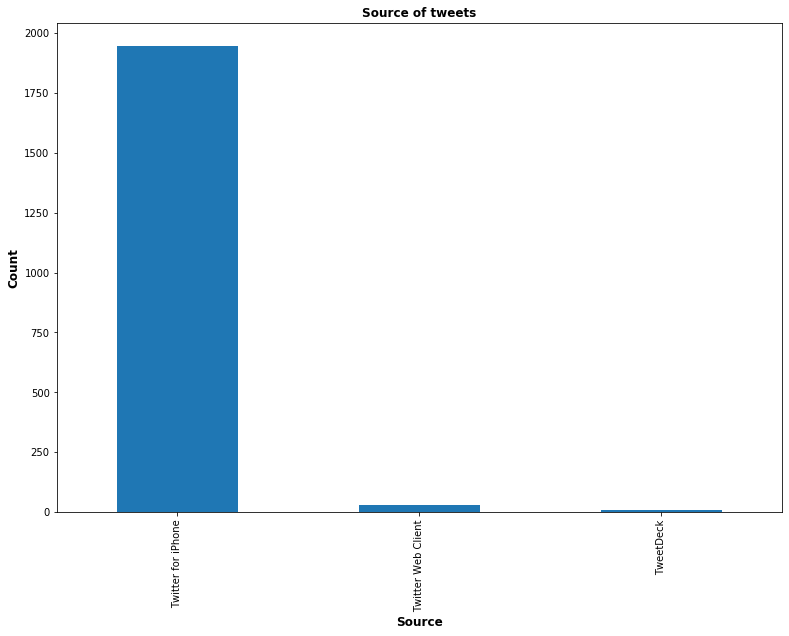

In [76]:
df_merged['source'].value_counts().plot(kind='bar', figsize = (13, 9))
plt.title("Source of tweets", weight='bold', size='large')
plt.xlabel("Source" , weight='bold', size='large')
plt.ylabel("Count", weight='bold', size='large')

We can see from this graph the source of tweets are from Iphone is much higher than other, with very small tweets from web and TweetDeck.

Text(0, 0.5, 'number of tweets')

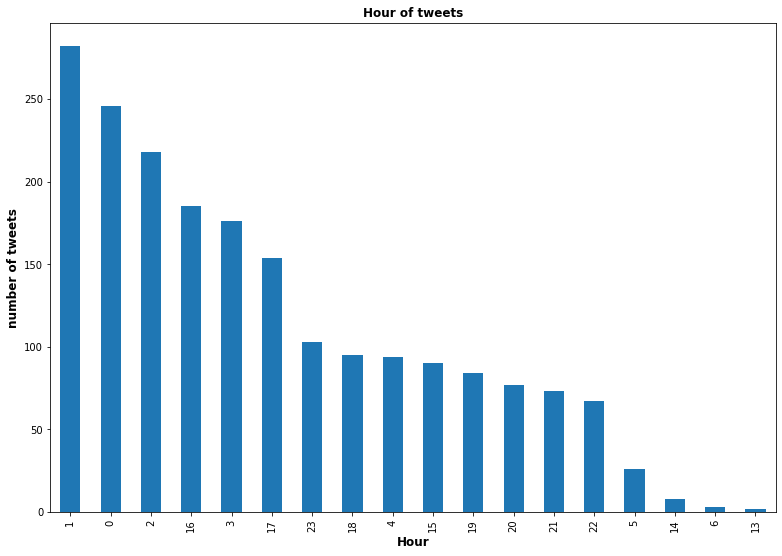

In [77]:
df_merged['hour'].value_counts().plot(kind='bar', figsize = (13, 9))
plt.title("Hour of tweets", weight='bold', size='large')
plt.xlabel("Hour" , weight='bold', size='large')
plt.ylabel("number of tweets", weight='bold', size='large')

We can see from the graph that most of tweet tweets after the midnight between 12:00 am and 2:00 am.

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'sum reactions in retweet and favorite')

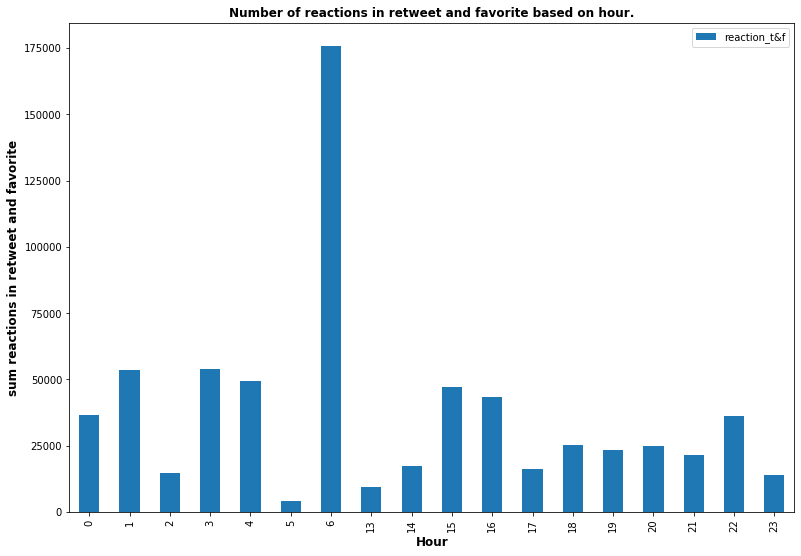

In [78]:
df_merged['reaction_t&f'] = 0
for i in range (df_merged.shape[0]):
    df_merged['reaction_t&f'][i] = df_merged['retweet_count'][i] + df_merged['favorite_count'][i]
df = df_merged.groupby('hour') 
df.first().plot( y= 'reaction_t&f', kind='bar', figsize = (13, 9))
plt.title("Number of reactions in retweet and favorite based on hour.", weight='bold', size='large')
plt.xlabel("Hour" , weight='bold', size='large')
plt.ylabel("sum reactions in retweet and favorite", weight='bold', size='large')

In this graph we may say there are a lot of intraction in tweets at 6:00 am, but we have to consider the rating of tweet and the text. Consider that will give us a better conclution about what is the most effict in intraction of tweets.

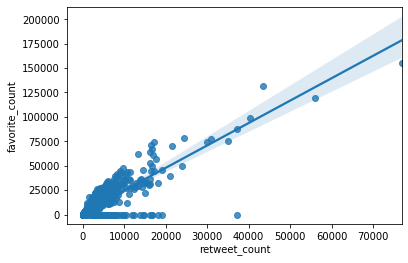

In [79]:
sns.regplot(x='retweet_count', y='favorite_count', data= df_merged)

We clearly see that there is a positive linear relationship, since when the retweet increase the favorite increase also.